<a href="https://colab.research.google.com/github/pulkitmehtawork/ML_Practice/blob/master/FMNIST_TFKERAS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
# Load data

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full , y_train_full) , (X_test , y_test) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# split data into train and valid set & divide by 255 to normalize the data 
X_valid , X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0 
y_valid , y_train = y_train_full[:5000] ,y_train_full[5000:]





In [8]:
# list of class names

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Defining Model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [10]:
# alternate way to define model 
# model = keras.models.Sequential([
#      keras.layers.Flatten(input_shape = [28,28]),
#       keras.layers.Dense(300,activation='relu'),
#       keras.layers.Dense(100,activation='relu'),
#         keras.layers.Dense(10,activation='softmax')])

In [11]:
#  model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Getting model layers and their weights

hidden1 = model.layers[1]

In [13]:
hidden1.name

'dense'

In [14]:
weights,biases = hidden1.get_weights()

In [15]:
weights.shape , biases.shape

((784, 300), (300,))

In [16]:
# compiling the model to specify the loss function , optimizer to use 
model.compile(optimizer='sgd',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
X_train.shape , X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [18]:
# fit the model 

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))



Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7015 - accuracy: 0.7708 - val_loss: 0.4998 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4847 - accuracy: 0.8316 - val_loss: 0.4671 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8465 - val_loss: 0.4089 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4141 - accuracy: 0.8549 - val_loss: 0.4256 - val_accuracy: 0.8530
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8613 - val_loss: 0.3848 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8674 - val_loss: 0.3793 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8700 - val_loss: 0.3589 - val_accuracy:

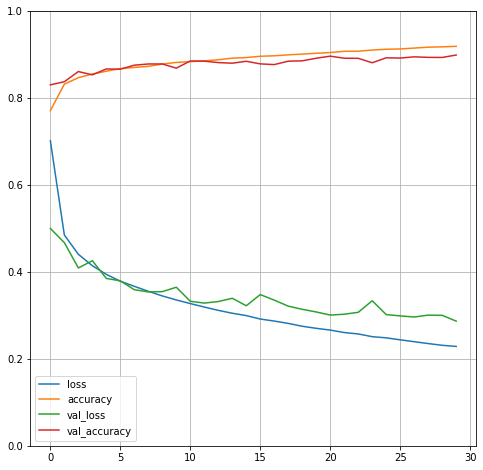

In [19]:
# plot the losses , accuracy

import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline


hisotry_loss = pd.DataFrame(history.history)
hisotry_loss.plot(figsize = (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
# evaluate it on test set 


model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.8253 - accuracy: 0.8475


[64.82530975341797, 0.8475000262260437]

In [21]:
# check predictions on first 3 records of test


test  =X_test[:3]
y_pred = model.predict_classes(test)
# predictions
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [22]:
# actual values
y_test[:3]

array([9, 2, 1], dtype=uint8)